# 선형 회귀 분석
- 정규방정식
- 배치 경사 하강법 (GD)
- 확률적 경사 하강법 (SGD)
- 미니배치 경사 하강법 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

In [3]:
# 정규 방적식을 이용하여 기울기 추정
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [4]:
theta_best
# y = 4+3*X+np.random.randn(100,1) 의 4, 3과 비슷하게 나옴. (x와 y를 통해서 기울기를 역추적)

array([[3.75454449],
       [3.20850019]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.75454449],
       [10.17154487]])

In [6]:
X_new_b

array([[1., 0.],
       [1., 2.]])

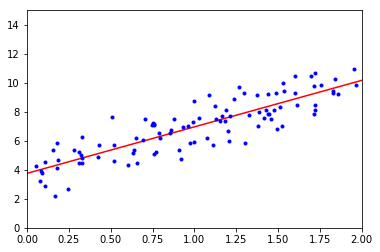

In [7]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
# 같은 작업을 하는 사이킷런 코드 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.75454449]), array([[3.20850019]]))

In [9]:
# Gradient Descent 
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    # theta gradient for mse cost function
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    # gradient update
    theta = theta - eta*gradients
    
    

In [10]:
#  정규방정식으로 찾은 것과 정확 
theta

array([[3.75454449],
       [3.20850019]])

In [11]:
# 확률적 경사 하강법
n_epochs = 50
t0,t1=5,50
def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)
# 그냥 GD는 전수 계산을 함으로 계산량이 많다. 확률적 경사 하강법은 에폭당 몇개의 샘플만을 뽑아 theta 계산
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

# 다항 회귀
비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다.

In [12]:
# y에 대한 2차방정식
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

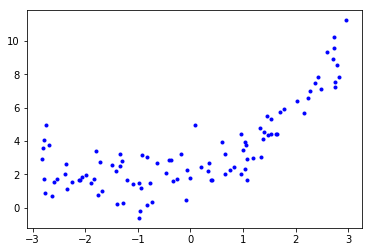

In [13]:
plt.plot(X,y,'b.')

In [14]:
from sklearn.preprocessing import PolynomialFeatures
ploy_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=ploy_features.fit_transform(X)

In [15]:
X[0]

array([1.5327331])

In [16]:
# X와 X^2
X_poly[0]

array([1.5327331 , 2.34927076])

In [17]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97471795]), array([[1.05585482, 0.49164089]]))

In [18]:
# 학습 곡선 그리기 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+',linewidth=2,label="Train set")
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label="Test set")
    

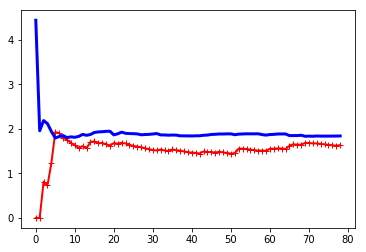

In [19]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)
# train set가 에폭이 진행될 수록 error가 올라가고 test set 은 error가 안정화 --> 과소적합 

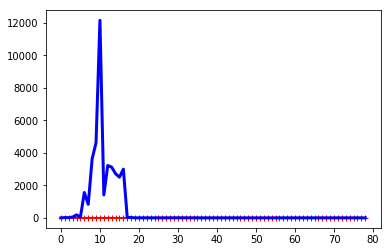

In [20]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features",PolynomialFeatures(degree=10, include_bias=False)), ("lin_reg",LinearRegression())])
plot_learning_curves(polynomial_regression, X,y)

#  규제가 있는 선형 모델
- 릿지 
- 랏쏘
- 엘라스틱 넷

### 모델의 분산과 편향 
High Varience - 과대 적합 야기 <br>
High Bias - 과소 적합 야기

In [23]:
# 사이킷런을 이용하여 (정규방정식) 릿지 파라미터 계산
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.02174245]])

In [28]:
# max_iter - epoch와 같은 개념
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.1361498])